In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
df = pd.read_excel('C:/Users/huseynovi/Desktop/Remote/Python projects/Bikes/Bike_sales.xlsx')

In [14]:
print("Shape:", df.shape)
df.head()
print(df.info())

Shape: (89, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Sales_Order #        89 non-null     int64         
 1   Date                 89 non-null     datetime64[ns]
 2   Day                  88 non-null     float64       
 3   Month                89 non-null     object        
 4   Year                 89 non-null     int64         
 5   Customer_Age         89 non-null     int64         
 6   Age_Group            88 non-null     object        
 7   Customer_Gender      89 non-null     object        
 8   Country              89 non-null     object        
 9   State                89 non-null     object        
 10  Product_Category     89 non-null     object        
 11  Sub_Category         89 non-null     object        
 12  Product_Description  88 non-null     object        
 13  Order_Quantity       

In [15]:
print("\nMissing values:\n", df.isna().sum())
print("\nDuplicated rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Missing values:
 Sales_Order #          0
Date                   0
Day                    1
Month                  0
Year                   0
Customer_Age           0
Age_Group              1
Customer_Gender        0
Country                0
State                  0
Product_Category       0
Sub_Category           0
Product_Description    1
Order_Quantity         1
 Unit_Cost             0
 Unit_Price            0
 Profit                0
 Cost                  0
Revenue                0
dtype: int64

Duplicated rows: 0


In [16]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
if 'Price' in df.columns and df['Price'].dtype == 'object':
    df['Price'] = (
        df['Price']
        .str.replace(r'[$,]', '', regex=True)
        .astype(float))

In [17]:
for col in ['Price', 'Quantity']:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)

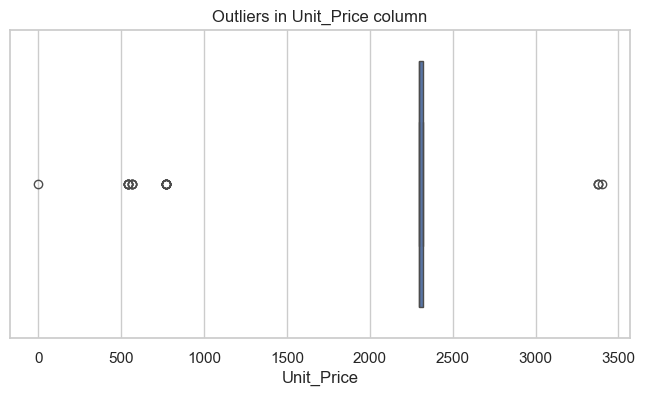

In [24]:
df.columns = df.columns.str.strip()

df['Order_Quantity'] = pd.to_numeric(df['Order_Quantity'], errors='coerce')
df['Unit_Price'] = pd.to_numeric(df['Unit_Price'], errors='coerce')

plt.figure(figsize=(8,4))
sns.boxplot(x=df['Unit_Price'])
plt.title("Outliers in Unit_Price column")
plt.show()

In [25]:
categories = df['Product_Category'].unique()
sales_per_cat_loop = {}
for cat in categories:
    sales_per_cat_loop[cat] = df[df['Product_Category'] == cat]['Order_Quantity'].sum()
sales_per_cat_loop

Product_Category
Bikes    187.0
Name: Order_Quantity, dtype: float64

In [27]:
outliers = df[(df["Unit_Price"] > df["Unit_Price"].quantile(0.99)) | (df["Unit_Price"] < df["Unit_Price"].quantile(0.01))]
print("Outliers:", len(outliers))

Outliers: 2


In [28]:
df.columns = [
    "Sales_Order", "Date", "Day", "Month", "Year", "Customer_Age", "Age_Group",
    "Customer_Gender", "Country", "State", "Product_Category", "Sub_Category",
    "Product_Description", "Order_Quantity", "Unit_Cost", "Unit_Price",
    "Profit", "Cost", "Revenue"
]

df["Order_Quantity"] = pd.to_numeric(df["Order_Quantity"], errors="coerce")
df["Unit_Price"] = pd.to_numeric(df["Unit_Price"], errors="coerce")
df["Profit"] = pd.to_numeric(df["Profit"], errors="coerce")
df["Revenue"] = pd.to_numeric(df["Revenue"], errors="coerce")
df["Customer_Age"] = pd.to_numeric(df["Customer_Age"], errors="coerce")
df = df.dropna()

summary = df.describe()
print(summary)

         Sales_Order                           Date        Day    Year  \
count      85.000000                             85  85.000000    85.0   
mean   261739.341176  2021-12-13 18:04:14.117647104  13.752941  2021.0   
min    261695.000000            2021-12-01 00:00:00   1.000000  2021.0   
25%    261719.000000            2021-12-10 00:00:00  10.000000  2021.0   
50%    261740.000000            2021-12-14 00:00:00  14.000000  2021.0   
75%    261761.000000            2021-12-19 00:00:00  19.000000  2021.0   
max    261782.000000            2021-12-24 00:00:00  24.000000  2021.0   
std        25.610430                            NaN   6.391784     0.0   

       Customer_Age  Order_Quantity    Unit_Cost   Unit_Price       Profit  \
count     85.000000       85.000000    85.000000    85.000000    85.000000   
mean      34.023529        2.117647  1054.105882  1944.929412  1847.117647   
min       17.000000        1.000000     0.000000     0.000000   245.000000   
25%       29.000000  

In [29]:
gender_sales = df.groupby("Customer_Gender")["Revenue"].sum()
country_profit = df.groupby("Country")["Profit"].sum().sort_values(ascending=False).head(10)
age_revenue = df.groupby("Age_Group")["Revenue"].mean().sort_values(ascending=False)
monthly_revenue = df.groupby(["Year","Month"])["Revenue"].sum().reset_index()
state_quantity = df.groupby("State")["Order_Quantity"].sum().sort_values(ascending=False).head(15)

In [30]:
corr = df[["Order_Quantity","Unit_Cost","Unit_Price","Profit","Cost","Revenue","Customer_Age"]].corr()

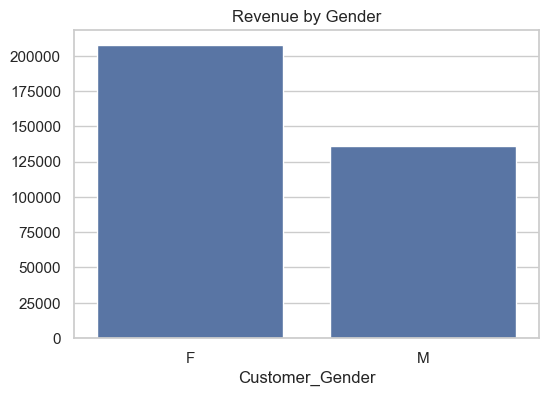

In [32]:
plt.figure(figsize=(6,4))
sns.barplot(x=gender_sales.index, y=gender_sales.values)
plt.title("Revenue by Gender")
plt.show()

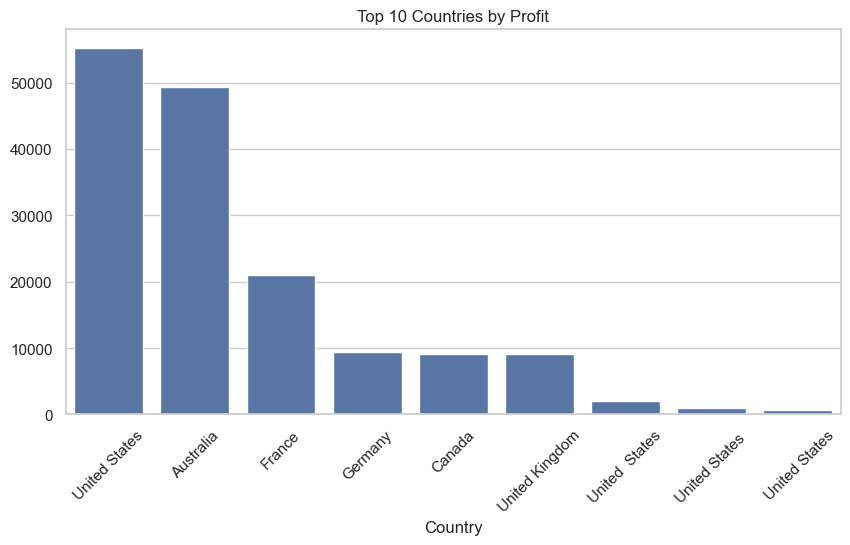

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x=country_profit.index, y=country_profit.values)
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Profit")
plt.show()

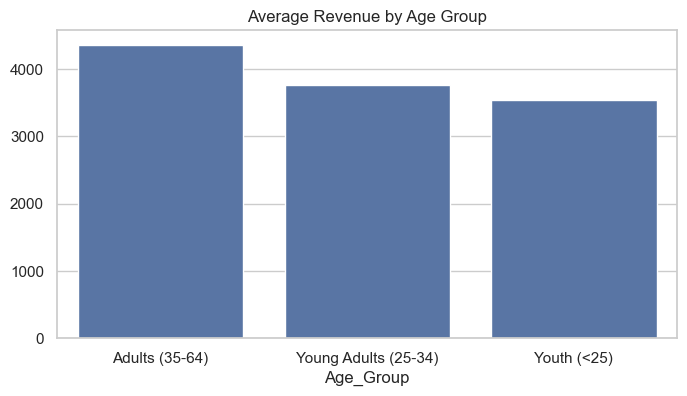

In [34]:
plt.figure(figsize=(8,4))
sns.barplot(x=age_revenue.index, y=age_revenue.values)
plt.title("Average Revenue by Age Group")
plt.show()

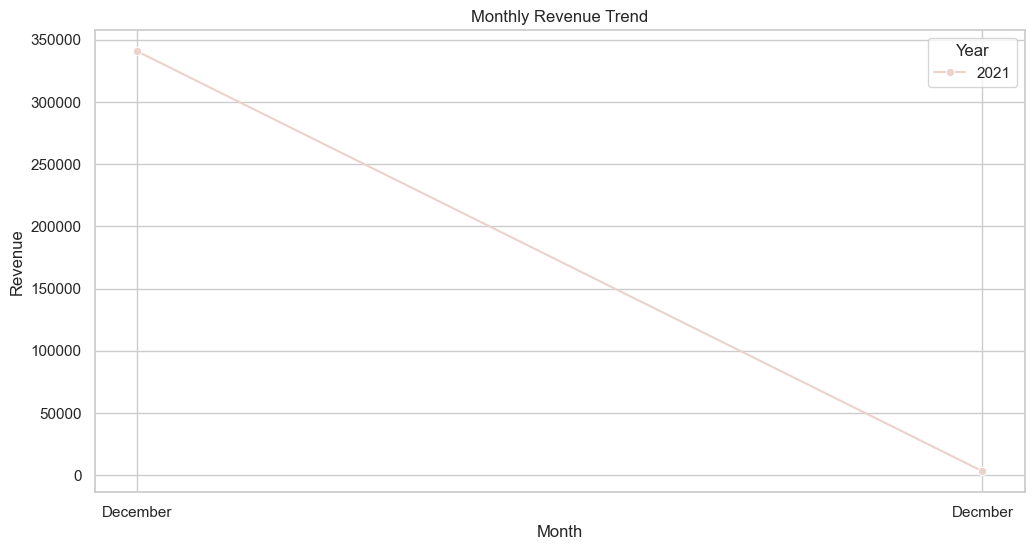

In [35]:
plt.figure(figsize=(12,6))
sns.lineplot(x="Month", y="Revenue", hue="Year", data=monthly_revenue, marker="o")
plt.title("Monthly Revenue Trend")
plt.show()

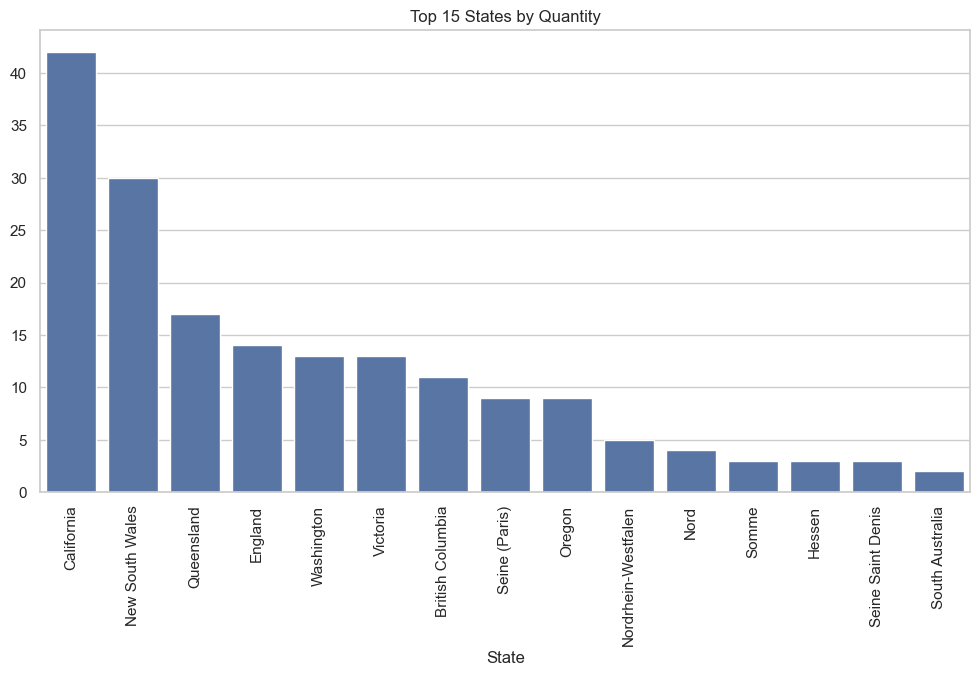

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(x=state_quantity.index, y=state_quantity.values)
plt.xticks(rotation=90)
plt.title("Top 15 States by Quantity")
plt.show()

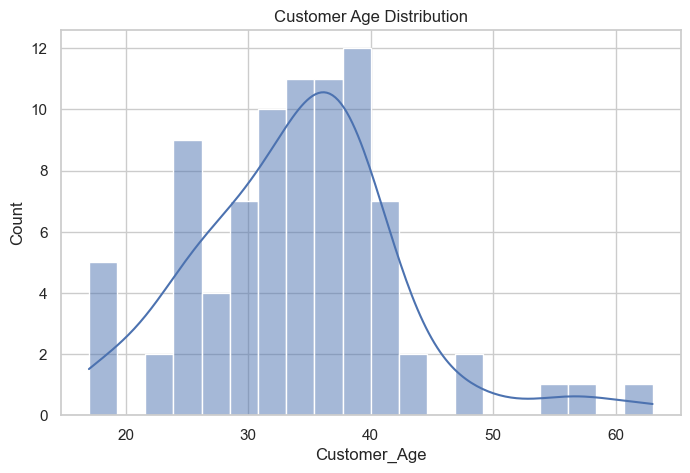

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(df["Customer_Age"], bins=20, kde=True)
plt.title("Customer Age Distribution")
plt.show()

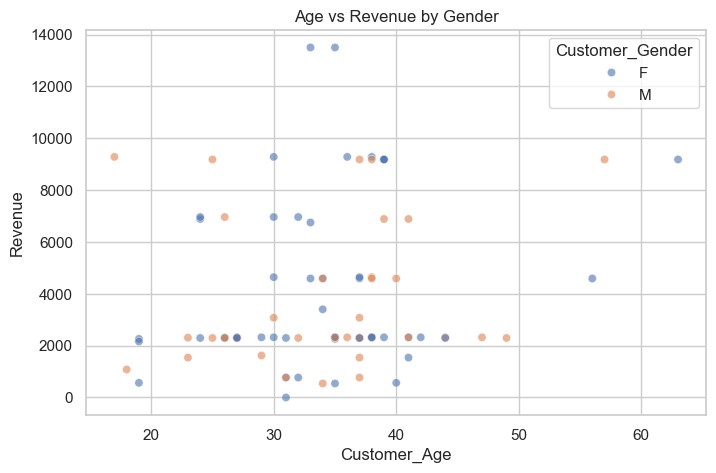

In [38]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Customer_Age", y="Revenue", hue="Customer_Gender", data=df, alpha=0.6)
plt.title("Age vs Revenue by Gender")
plt.show()

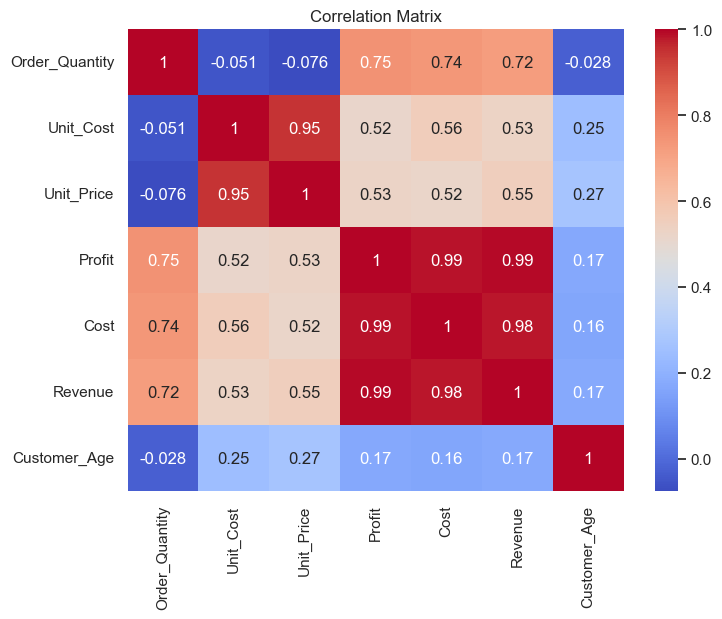

In [39]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [41]:
df["Profit_Margin"] = df["Profit"] / df["Revenue"]
df["Revenue_per_Unit"] = df["Revenue"] / df["Order_Quantity"]

age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ["<18","18-25","26-35","36-45","46-55","56-65","65+"]
df["Age_Bin"] = pd.cut(df["Customer_Age"], bins=age_bins, labels=age_labels)

revenue_threshold = df["Revenue"].quantile(0.75)
df["High_Revenue_Flag"] = np.where(df["Revenue"] > revenue_threshold, 1, 0)

category_profit_margin = df.groupby("Product_Category")["Profit_Margin"].mean().sort_values(ascending=False)
category_revenue = df.groupby("Product_Category")["Revenue"].sum().sort_values(ascending=False)
age_revenue = df.groupby("Age_Bin")["Revenue"].mean().sort_values(ascending=False)
gender_revenue = df.groupby("Customer_Gender")["Revenue"].sum()
top_states = df.groupby("State")["Revenue"].sum().sort_values(ascending=False).head(10)
monthly_revenue = df.groupby(["Year","Month"])["Revenue"].sum().reset_index()

C:\Users\huseynovi\AppData\Local\Temp\ipykernel_49612\3899391827.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_revenue = df.groupby("Age_Bin")["Revenue"].mean().sort_values(ascending=False)


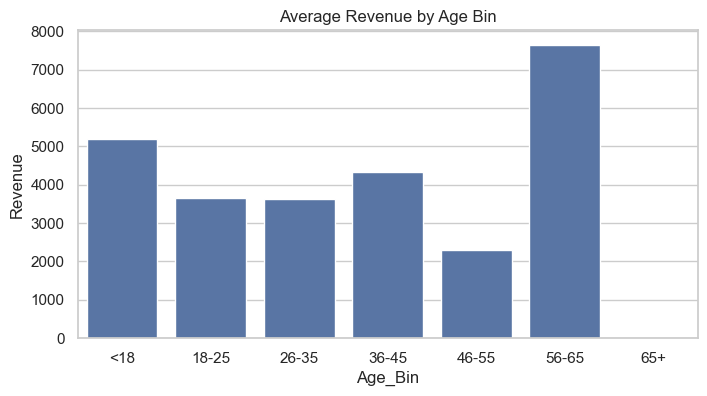

In [44]:
plt.figure(figsize=(8,4))
sns.barplot(x=age_revenue.index, y=age_revenue.values)
plt.title("Average Revenue by Age Bin")
plt.ylabel("Revenue")
plt.show()

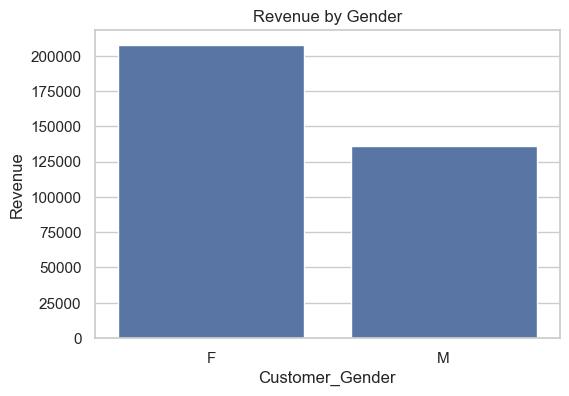

In [45]:
plt.figure(figsize=(6,4))
sns.barplot(x=gender_revenue.index, y=gender_revenue.values)
plt.title("Revenue by Gender")
plt.ylabel("Revenue")
plt.show()

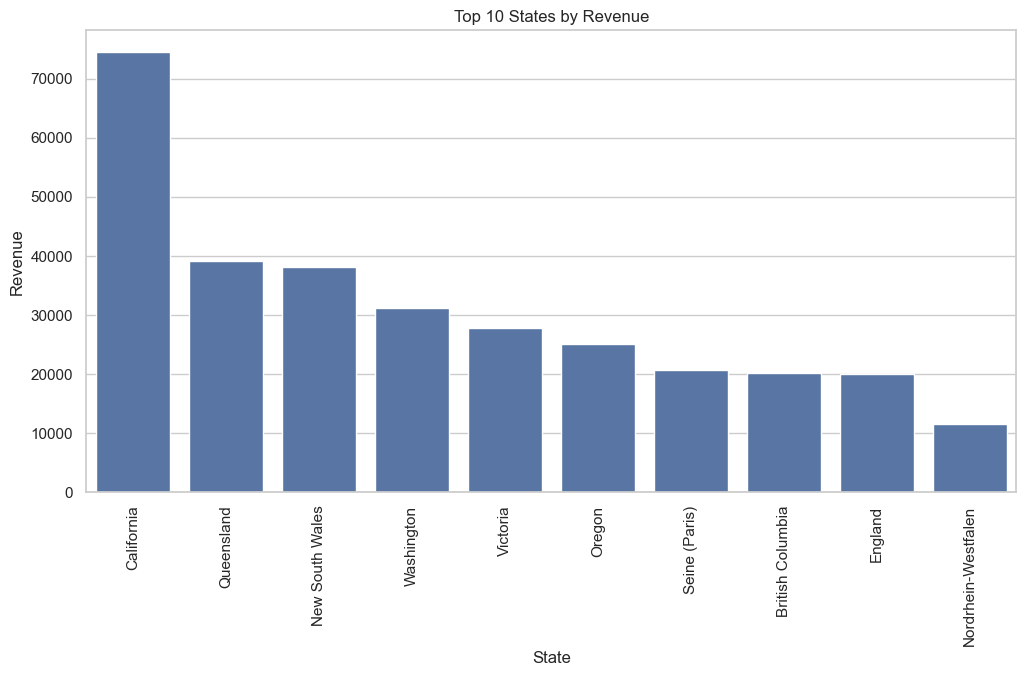

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_states.index, y=top_states.values)
plt.xticks(rotation=90)
plt.title("Top 10 States by Revenue")
plt.ylabel("Revenue")
plt.show()

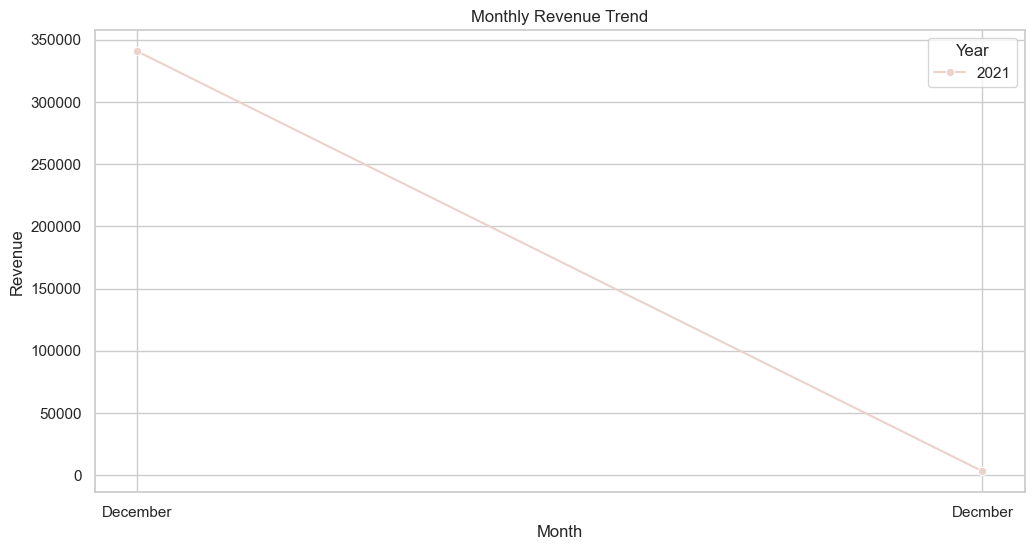

In [47]:
plt.figure(figsize=(12,6))
sns.lineplot(x="Month", y="Revenue", hue="Year", data=monthly_revenue, marker="o")
plt.title("Monthly Revenue Trend")
plt.show()

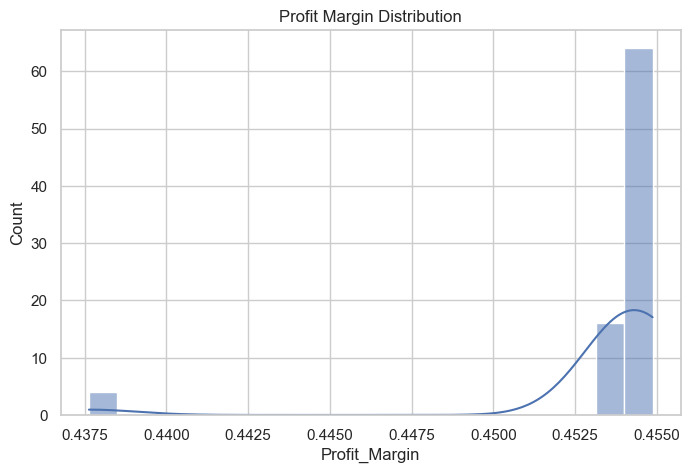

In [48]:
plt.figure(figsize=(8,5))
sns.histplot(df["Profit_Margin"], bins=20, kde=True)
plt.title("Profit Margin Distribution")
plt.show()

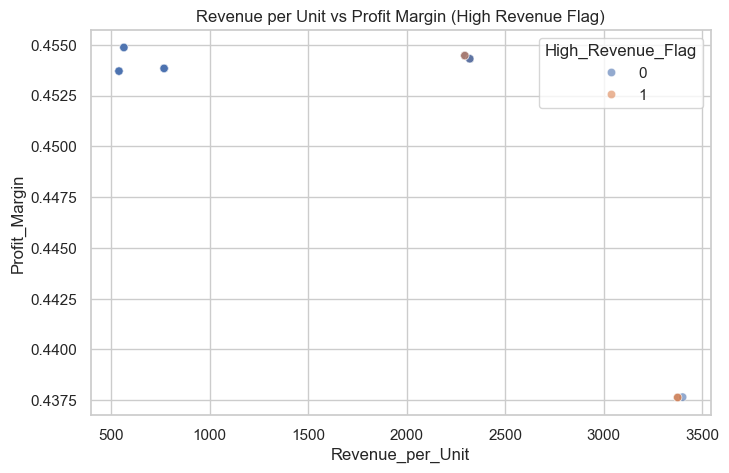

In [49]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Revenue_per_Unit", y="Profit_Margin", hue="High_Revenue_Flag", data=df, alpha=0.6)
plt.title("Revenue per Unit vs Profit Margin (High Revenue Flag)")
plt.show()

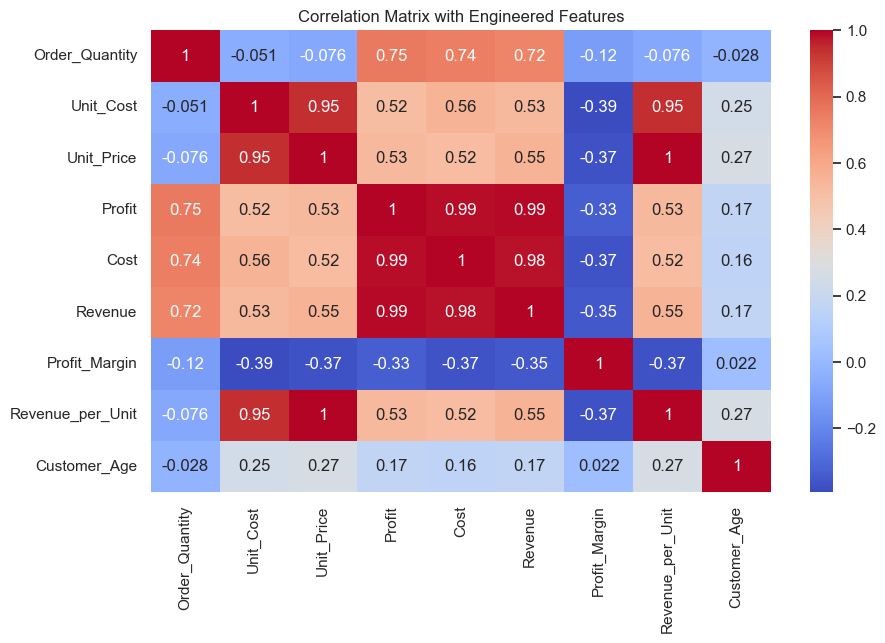

In [50]:
corr = df[["Order_Quantity","Unit_Cost","Unit_Price","Profit","Cost","Revenue","Profit_Margin","Revenue_per_Unit","Customer_Age"]].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix with Engineered Features")
plt.show()

In [52]:
df['Sub_Category'].unique()

array(['Mountain Bikes'], dtype=object)

In [53]:
df["Order_Quantity"] = pd.to_numeric(df["Order_Quantity"], errors="coerce")
df["Unit_Cost"] = pd.to_numeric(df["Unit_Cost"], errors="coerce")
df["Unit_Price"] = pd.to_numeric(df["Unit_Price"], errors="coerce")
df["Profit"] = pd.to_numeric(df["Profit"], errors="coerce")
df["Cost"] = pd.to_numeric(df["Cost"], errors="coerce")
df["Revenue"] = pd.to_numeric(df["Revenue"], errors="coerce")
df["Customer_Age"] = pd.to_numeric(df["Customer_Age"], errors="coerce")
df = df.dropna()

df["Cost_per_Unit"] = df["Cost"] / df["Order_Quantity"]
df["Profit_per_Unit"] = df["Profit"] / df["Order_Quantity"]
df["Profit_Margin"] = df["Profit"] / df["Revenue"]

cost_threshold = df["Cost_per_Unit"].quantile(0.75)
profit_threshold = df["Profit_per_Unit"].quantile(0.25)
df["High_Cost_Flag"] = np.where(df["Cost_per_Unit"] > cost_threshold, 1, 0)
df["Low_Profit_Flag"] = np.where(df["Profit_per_Unit"] < profit_threshold, 1, 0)

product_cost = df.groupby("Product_Description")["Cost_per_Unit"].mean().sort_values(ascending=False)
product_profit = df.groupby("Product_Description")["Profit_per_Unit"].mean().sort_values(ascending=False)
state_cost = df.groupby("State")["Cost_per_Unit"].mean().sort_values(ascending=False)
country_profit = df.groupby("Country")["Profit_per_Unit"].mean().sort_values(ascending=False)
age_revenue = df.groupby("Age_Group")["Revenue"].mean().sort_values(ascending=False)
gender_profit = df.groupby("Customer_Gender")["Profit_per_Unit"].mean()

C:\Users\huseynovi\AppData\Local\Temp\ipykernel_49612\494268001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_cost.index, y=product_cost.values, palette="magma")


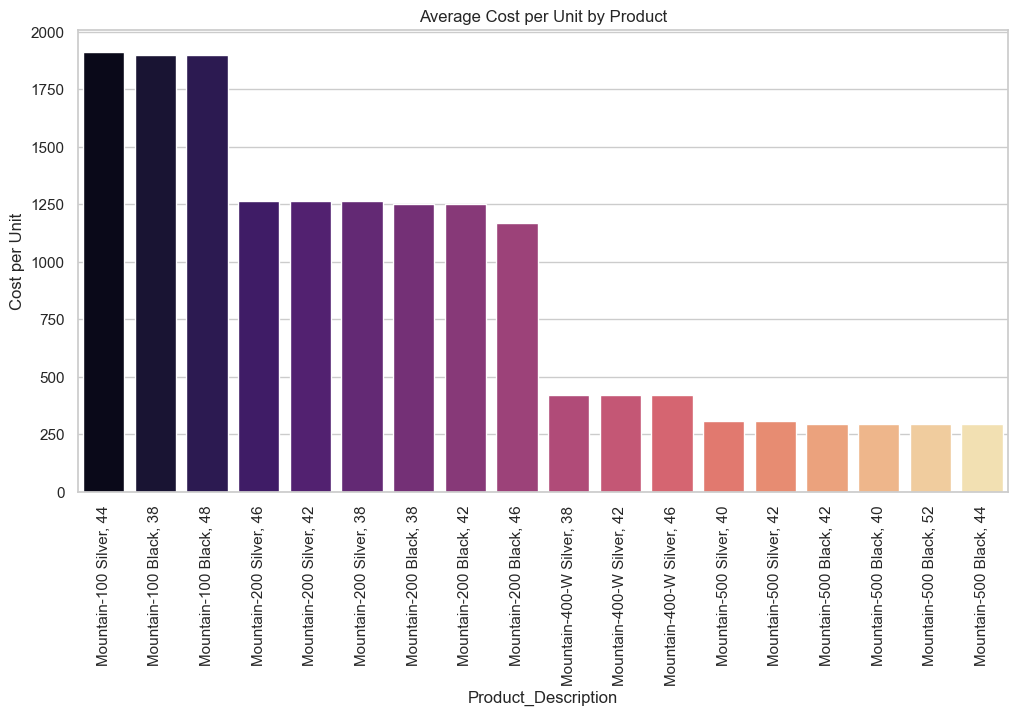

In [54]:
plt.figure(figsize=(12,6))
sns.barplot(x=product_cost.index, y=product_cost.values, palette="magma")
plt.xticks(rotation=90)
plt.title("Average Cost per Unit by Product")
plt.ylabel("Cost per Unit")
plt.show()

C:\Users\huseynovi\AppData\Local\Temp\ipykernel_49612\2712457775.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_profit.index, y=product_profit.values, palette="viridis")


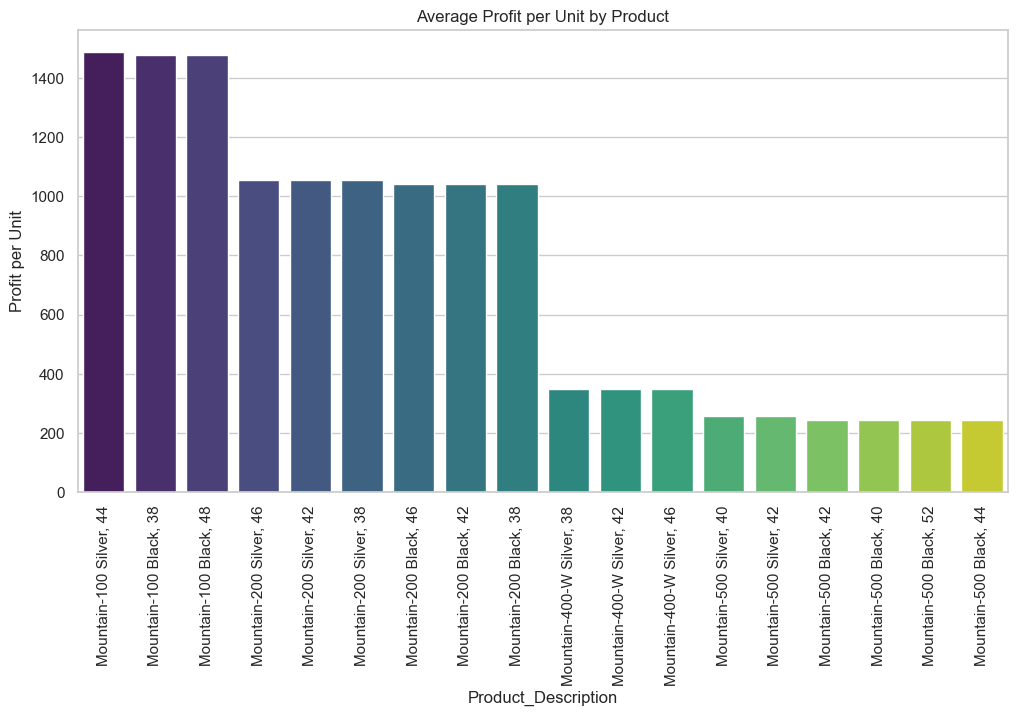

In [55]:
plt.figure(figsize=(12,6))
sns.barplot(x=product_profit.index, y=product_profit.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Average Profit per Unit by Product")
plt.ylabel("Profit per Unit")
plt.show()

C:\Users\huseynovi\AppData\Local\Temp\ipykernel_49612\2532238756.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_cost.index, y=state_cost.values, palette="coolwarm")


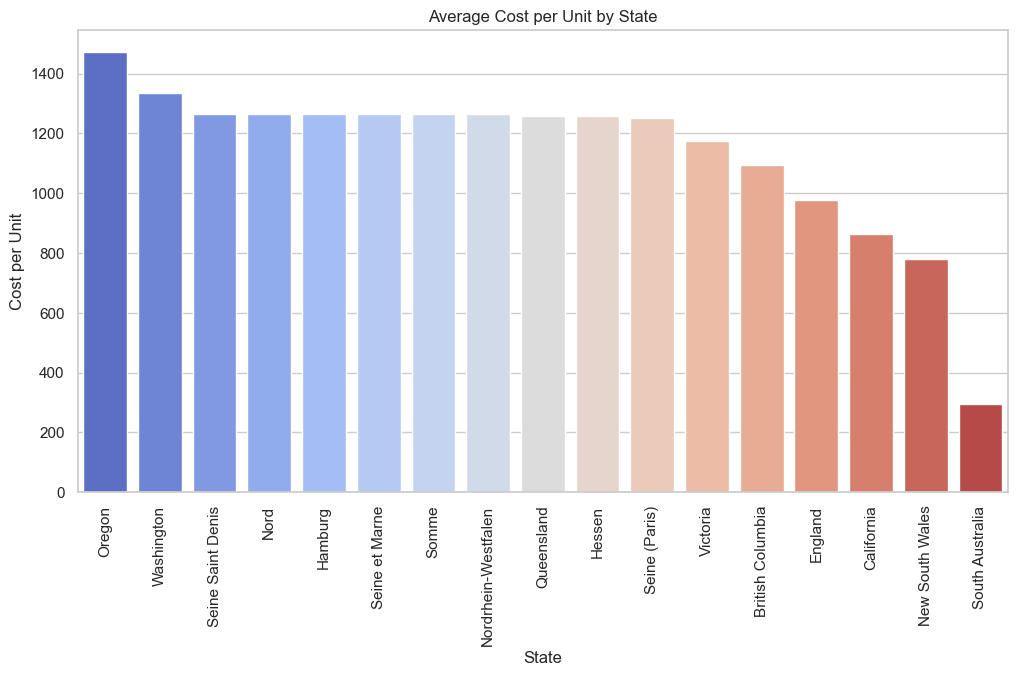

In [56]:
plt.figure(figsize=(12,6))
sns.barplot(x=state_cost.index, y=state_cost.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Average Cost per Unit by State")
plt.ylabel("Cost per Unit")
plt.show()

C:\Users\huseynovi\AppData\Local\Temp\ipykernel_49612\977664417.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_profit.index, y=country_profit.values, palette="rocket")


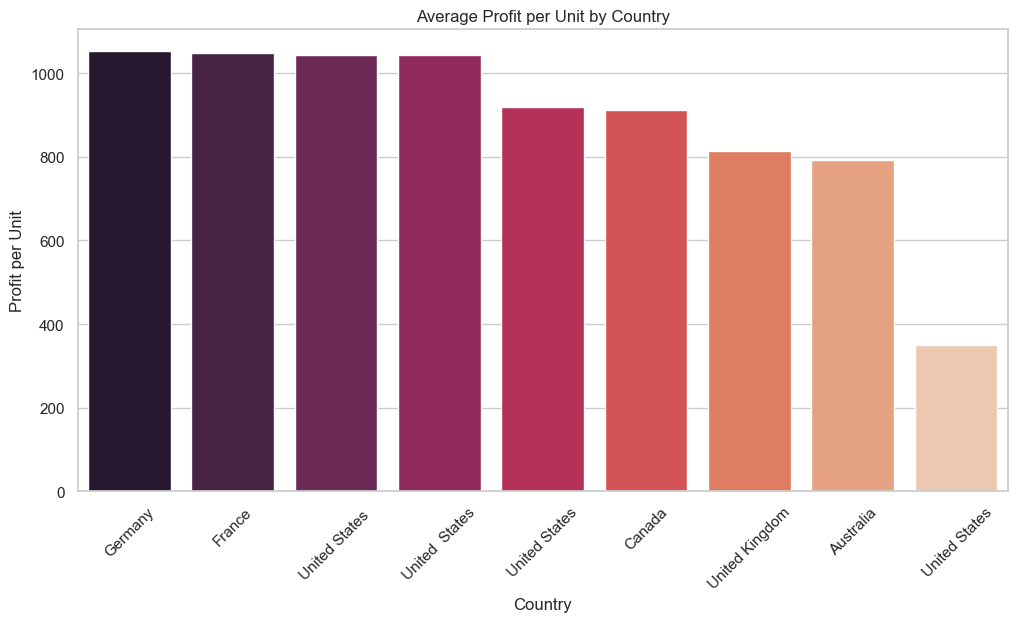

In [57]:
plt.figure(figsize=(12,6))
sns.barplot(x=country_profit.index, y=country_profit.values, palette="rocket")
plt.xticks(rotation=45)
plt.title("Average Profit per Unit by Country")
plt.ylabel("Profit per Unit")
plt.show()

C:\Users\huseynovi\AppData\Local\Temp\ipykernel_49612\2131353572.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Customer_Gender", y="Profit_per_Unit", data=df, palette="Set2")


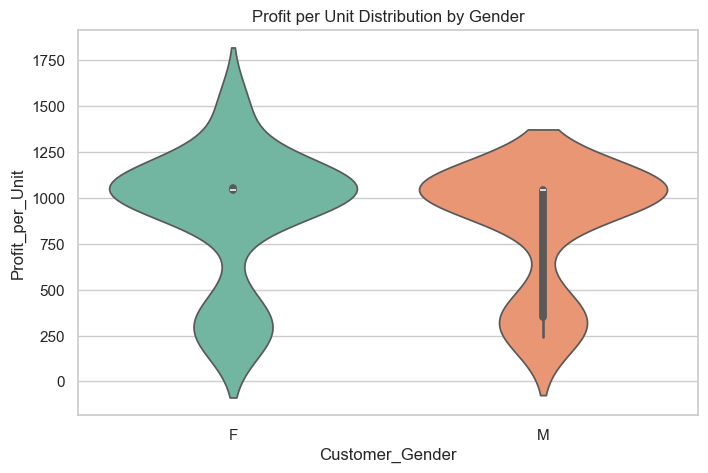

In [58]:
plt.figure(figsize=(8,5))
sns.violinplot(x="Customer_Gender", y="Profit_per_Unit", data=df, palette="Set2")
plt.title("Profit per Unit Distribution by Gender")
plt.show()

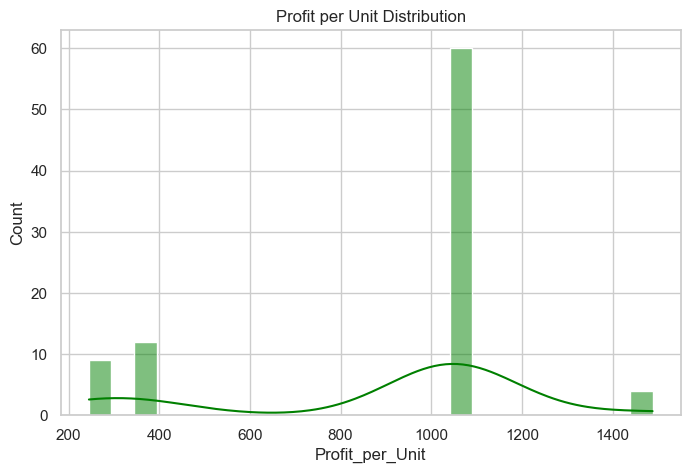

In [59]:
plt.figure(figsize=(8,5))
sns.histplot(df["Profit_per_Unit"], bins=25, kde=True, color="green")
plt.title("Profit per Unit Distribution")
plt.show()

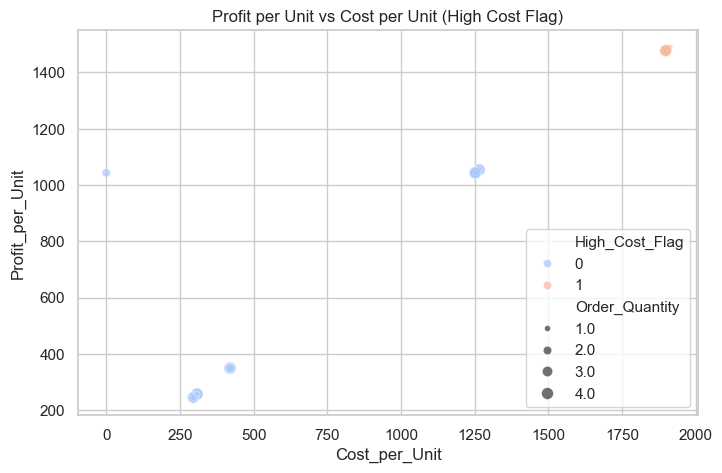

In [60]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Cost_per_Unit", y="Profit_per_Unit", hue="High_Cost_Flag", size="Order_Quantity",
                data=df, palette="coolwarm", alpha=0.7)
plt.title("Profit per Unit vs Cost per Unit (High Cost Flag)")
plt.show()

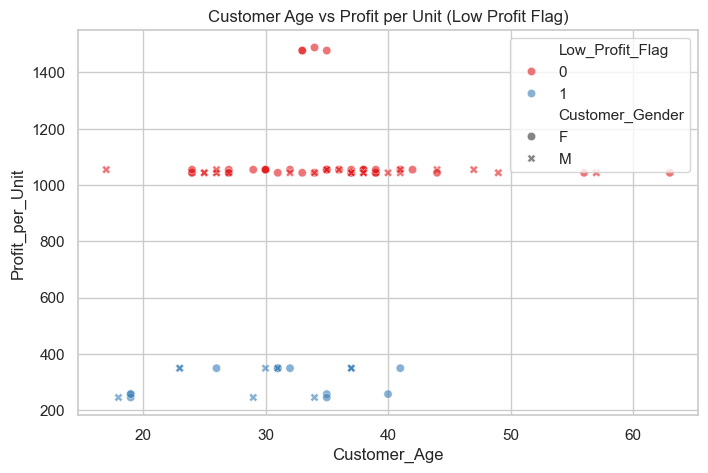

In [61]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Customer_Age", y="Profit_per_Unit", hue="Low_Profit_Flag", style="Customer_Gender",
                data=df, alpha=0.6, palette="Set1")
plt.title("Customer Age vs Profit per Unit (Low Profit Flag)")
plt.show()

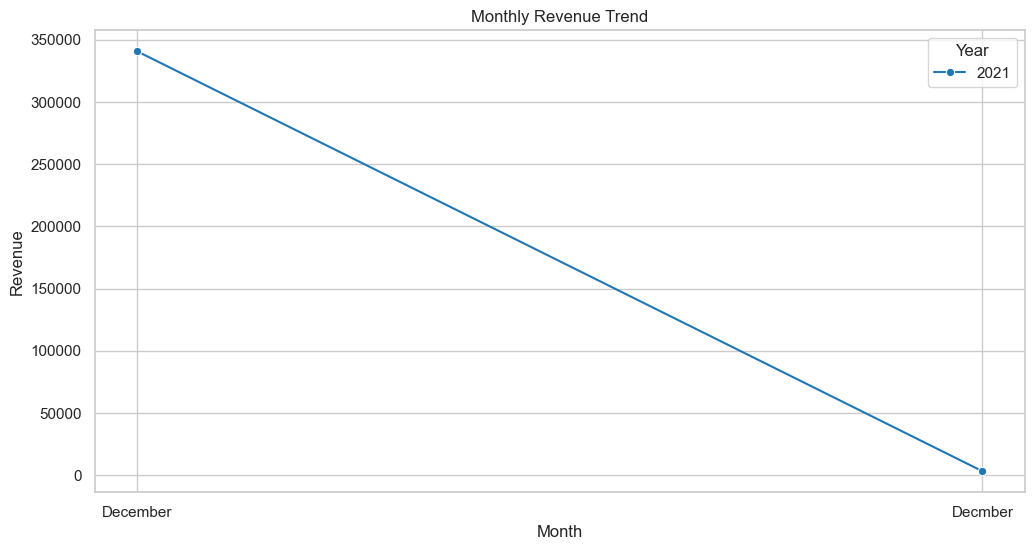

In [62]:
plt.figure(figsize=(12,6))
monthly_revenue = df.groupby(["Year","Month"])["Revenue"].sum().reset_index()
sns.lineplot(x="Month", y="Revenue", hue="Year", data=monthly_revenue, marker="o", palette="tab10")
plt.title("Monthly Revenue Trend")
plt.show()

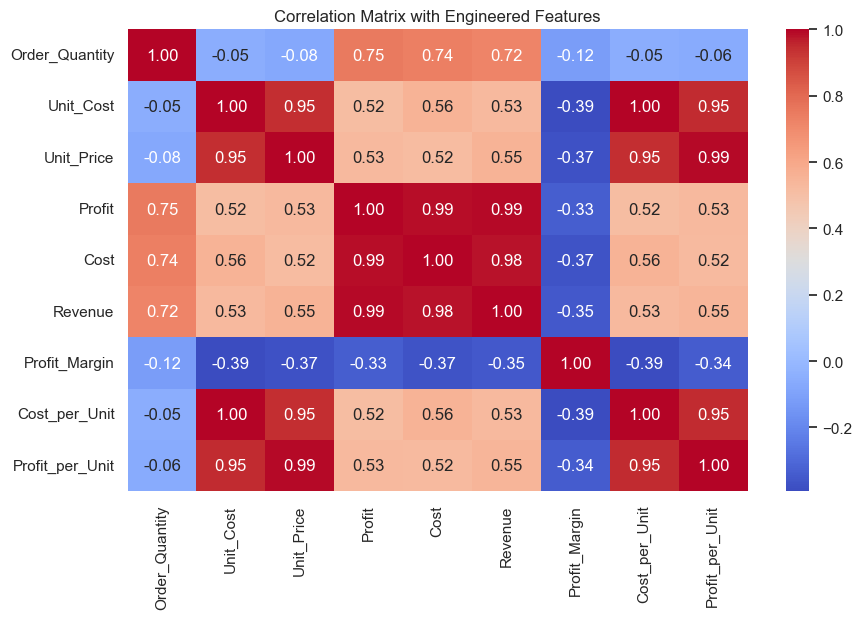

In [63]:
plt.figure(figsize=(10,6))
corr = df[["Order_Quantity","Unit_Cost","Unit_Price","Profit","Cost","Revenue","Profit_Margin","Cost_per_Unit","Profit_per_Unit"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix with Engineered Features")
plt.show()